### A simple Spam Classifier using 
1. Logistic Regression.
2. SVM.
3. Gaussian Naive Bayes Algorithm
4. Decision Tree Classifier
5. Random Forest
6. XGBoost Classifier
7. LightGBM
8. RNN
9. LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import HashingVectorizer
from collections import Counter
%matplotlib inline

In [2]:
# import nltk libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
from math import sqrt, log

In [3]:
stemmer = SnowballStemmer("english")
print(stemmer.stem("running"))
print(SnowballStemmer("english").stem("generously"))

run
generous


#### Download the data from the link
'https://drive.google.com/open?id=0ByJLBTmJojjzdTdvRC10TnhCa2M'

In [4]:
ham = pd.read_csv('./spam_filtering/ham', sep='|', names = ['text'], dtype=str)
spam = pd.read_csv('./spam_filtering/spam', sep='|', names = ['text'], dtype=str)
ham.head(4)

,text
0,Rofl. Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity, * was in mood for that. So...any other s..."
3,Will ü b going to esplanade fr home?


In [5]:
spam.head(4)

,text
0,You have 1 new message. Please call 08712400200.
1,Urgent! Please call 09061743811 from landline....
2,Dear 0776xxxxxxx U've been invited to XCHAT. T...
3,U 447801259231 have a secret admirer who is lo...


In [6]:
# Preparing the text data
# Removing stop words and special characters
# Making word dictionary
def make_dictionary(data_1, data_2):
    emails_1 = list(data_1.text)  # list of emails  
    emails_2 = list(data_2.text)
    all_words = []       
    
    for mail in emails_1:    
                    words = mail.split()
                    all_words += words
    for mail in emails_2:    
                    words = mail.split()
                    all_words += words
    
    dictionary = Counter(all_words)
    # Paste code for non-word removal here(code snippet is given below) 
    return dictionary

In [7]:
dictionary = make_dictionary(spam, ham)

In [8]:
list_to_remove = list(dictionary.keys())
for item in list_to_remove:
    if item.isalpha() == False: 
        del dictionary[item]
    elif len(item) == 1:
        del dictionary[item]
dictionary = dictionary.most_common(3000)

In [9]:
def extract_features(mail): 
    mails = list(mail.text)
    features_matrix = np.zeros((len(mails),3000))
    mail_no = 0
    for mail in mails:
        words = mail.split()
        for word in words:
            wordID = 0
            for i,d in enumerate(dictionary):
                if d[0] == word:
                    wordID = i
                    break
            features_matrix[mail_no,wordID] = words.count(word)
        mail_no = mail_no + 1     
    return features_matrix

In [10]:
spam_input = extract_features(spam)
ham_input = extract_features(ham)

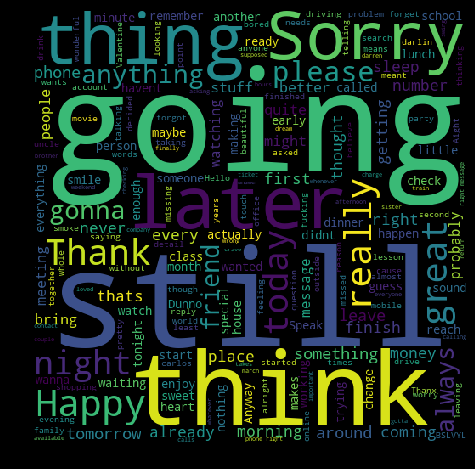

In [11]:
# Words mostly occuring in Ham mails
ham_1 = [x for y in list(ham.text) for x in y.split(' ')]
ham_1 = [x for x in ham_1 if x.isalpha() and len(x)>4]
ham_1 = ' '.join(ham_1)
ham_wc = WordCloud(width=512, height=512).generate(ham_1)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

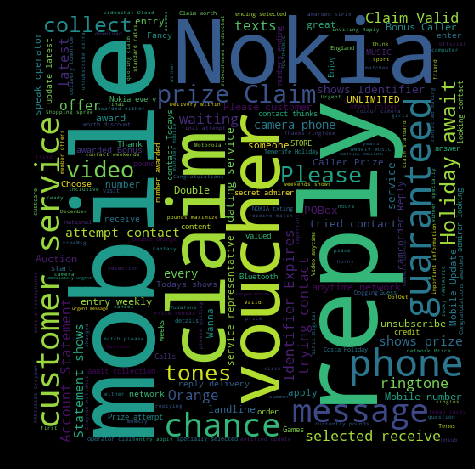

In [12]:
# Words mostly occuring in Spam mails
spam_1 = [x for y in list(spam.text) for x in y.split(' ')]
spam_1 = [x for x in spam_1 if x.isalpha() and len(x)>4]
spam_1 = ' '.join(spam_1)
spam_wc = WordCloud(width=512, height=512).generate(spam_1)
plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.show()
# Expected spam words like clain, phone, voucher, mobile. are frequently occuring in Spam Emails.

In [13]:
spam_input.shape, ham_input.shape

((747, 3000), (4803, 3000))

In [14]:
spam_train = spam_input[:700]
ham_train = ham_input[:4000]
spam_test = spam_input[700:]
ham_test = ham_input[4000:]

In [15]:
spam_train.shape, ham_train.shape, spam_test.shape, ham_test.shape

((700, 3000), (4000, 3000), (47, 3000), (803, 3000))

In [16]:
train_X = np.vstack((spam_train,ham_train))
train_y = [1 for i in range(700)] + [0 for i in range(4000)]

In [17]:
test_X = np.vstack((spam_test,ham_test))
test_y = [1 for i in range(47)] + [0 for i in range(803)]

In [18]:
train_X.shape, len(train_y), test_X.shape, len(test_y)

((4700, 3000), 4700, (850, 3000), 850)

In [112]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
#from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### 1- Using Logistic Regression

In [82]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=100)
grid_search.fit(train_X, train_y)
print(grid_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.887, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.880, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.894, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.885, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

In [83]:
# Select the model with best params
logistic_regression_model = grid_search.best_estimator_
logistic_regression_model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# Calculate the Output on test set
result = logistic_regression_model.predict(test_X)

In [85]:
print('Metric for Logistic Regression')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)

Metric for Logistic Regression
Accuracy: 0.982353
Precision: 0.900000
Recall: 0.765957
F1 score: 0.827586
Cohens kappa: 0.818350
ROC AUC: 0.880488
[[799   4]
 [ 11  36]]


### 2- Using Support Vector Machine

In [56]:
Cs = [0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
kernel=['linear'] # 'poly', 'rbf'
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}
grid_search = GridSearchCV(svm.SVC(), param_grid, verbose=100, cv=5)
grid_search.fit(train_X, train_y)
print(grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.851, total=  17.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.7s remaining:    0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.851, total=  17.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   35.6s remaining:    0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.851, total=  18.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   53.7s remaining:    0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.851, total=  18.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] .... C=0.01, gamma=0.1, kernel=linear, score=0.922, total=  17.2s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed: 11.4min remaining:    0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] .... C=0.01, gamma=0.1, kernel=linear, score=0.937, total=  17.5s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 11.7min remaining:    0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] .... C=0.01, gamma=0.1, kernel=linear, score=0.928, total=  17.4s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 12.0min remaining:    0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] .... C=0.01, gamma=0.1, kernel=linear, score=0.928, total=  17.1s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 12.3min remaining:    0.0s
[CV] C=0.01, gamma=0.1, kernel=poly ..................................
[CV] ...... C=0.01, gamma=0.1, kernel=poly, score=0.850, total=  28.4s
[Parallel(n_jobs=1)]: Done  41 out of  41

[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.851, total=  19.4s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed: 26.7min remaining:    0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] ..... C=0.1, gamma=0.001, kernel=poly, score=0.851, total=  19.3s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 27.0min remaining:    0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.851, total=  19.9s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed: 27.4min remaining:    0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.851, total=  19.9s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed: 27.7min remaining:    0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.851, total=  21.2s
[Parallel(n_jobs=1)]: Done  78 out of  78

[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.946, total=  40.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.944, total=  26.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.944, total=  29.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.851, total=  21.7s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.851, total=  21.4s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.851, total=  21.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.851, total=  21.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ........... C=1, gamma=1, kernel=poly, score=0.955, total=  27.7s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.946, total=  25.7s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.944, total=  25.4s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.945, total=  25.2s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.946, total=  26.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.963, total=  17.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.944, total=  16.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ........ C=10, gamma=1, kernel=linear, score=0.980, total=  11.3s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.966, total=  11.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.955, total=  24.7s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.946, total=  25.4s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.944, total=  42.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.945, total=  24.6s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .......... C=10, gamma=1, kernel=poly, score=0.946, total=  43.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ....... C=100, gamma=1, kernel=linear, score=0.973, total=  14.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.966, total=  14.5s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.980, total=  14.3s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.968, total=  13.6s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.955, total=  27.6s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.946, total=  34.3s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.944, total=  26.4s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] .

In [97]:
# Select the model with best params
svm_model = grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
# Calculate the Output on test set
result = svm_model.predict(test_X)

In [99]:
print('Metric for Support Vector Machine')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)

Metric for Support Vector Machine
Accuracy: 0.985882
Precision: 0.972973
Recall: 0.765957
F1 score: 0.857143
Cohens kappa: 0.849828
ROC AUC: 0.882356
[[802   1]
 [ 11  36]]


### 3- Using Multinomial Naive Bayes Algorithm

In [63]:
model = MultinomialNB()
model.fit(train_X,train_y)
result = model.predict(test_X)

print('Metric for MultinomialNB')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)

Metric for MultinomialNB
Accuracy: 0.981176
Precision: 0.803922
Recall: 0.872340
F1 score: 0.836735
Cohens kappa: 0.826765
ROC AUC: 0.929944
[[793  10]
 [  6  41]]


In [68]:
# Make your own confusion matrics
import pandas as pd
y_actu = pd.Series(test_y, name='Actual')
y_pred = pd.Series(result, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, margins=True)

In [69]:
df_confusion

Predicted,0,1,All
Actual,,,
0,793,10,803
1,6,41,47
All,799,51,850


### 4- Using Decision TreeClassification

In [140]:
from sklearn import tree
from sklearn import metrics

In [131]:
model = tree.DecisionTreeClassifier()
print ("Training model")
#train model

model.fit(train_X,train_y)
result = model.predict(test_X)

print('Metric for Decision Tree Classifier')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)

Training model
Metric for Decision Tree Classifier
Accuracy: 0.962353
Precision: 0.636364
Recall: 0.744681
F1 score: 0.686275
Cohens kappa: 0.666380
ROC AUC: 0.859887
[[783  20]
 [ 12  35]]


In [132]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### HyperParameter Tuning For Decision Tree Classifier
*'Criterion'*: `Gini` for spliting node based on `Gini Impurity` and `Entropy` for splitting node based on `Information Gain`

`*References*`: https://medium.com/machine-learning-101/chapter-3-decision-tree-classifier-coding-ae7df4284e99

In [130]:
# Tune Decision Tree Classfier 
param_grid = {'criterion':['gini', 'entropy'], 'min_samples_split':[10,20,40,50], }
grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, verbose=100, cv=3)
grid_search.fit(train_X, train_y)
print ("Training model")
#train model
dct_model = grid_search.best_estimator_
print(grid_search.best_params_)
result = dct_model.predict(test_X)

print('Metric for Decision Tree Classifier')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] criterion=gini, min_samples_split=10 ............................
[CV]  criterion=gini, min_samples_split=10, score=0.950, total=   5.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s
[CV] criterion=gini, min_samples_split=10 ............................
[CV]  criterion=gini, min_samples_split=10, score=0.954, total=   5.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.7s remaining:    0.0s
[CV] criterion=gini, min_samples_split=10 ............................
[CV]  criterion=gini, min_samples_split=10, score=0.962, total=   4.9s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.6s remaining:    0.0s
[CV] criterion=gini, min_samples_split=20 ............................
[CV]  criterion=gini, min_samples_split=20, score=0.948, total=   4.7s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

#### <center> Tune `Max_depth`
`The deeper the tree, the more splits it has and it captures more information about the data`
    
`False Positive Rate = FP / (FP + TN)`
    
`True Positive Rate = TP / (TP + FN)`  also known as- Recall, Sensitivity.

`True Negative Rate = TN / (TN + FP)` also known as- Specificity.

`False Negative Rate = FN / (FN + TP)`

`Precision = TP / (TP + FP)`

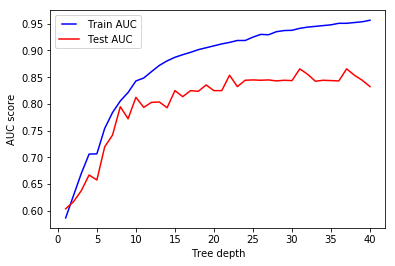

In [141]:
# Tune Max_depth
max_depths = np.linspace(1, 40, 40, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(train_X, train_y)
    
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(train_y, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

#### <center> Tune `min_samples_split`
`The minimum number of samples required to split an internal node`

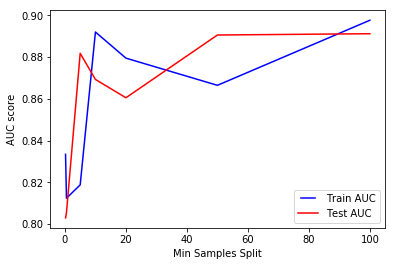

In [142]:
min_samples_splits = [0.2,0.5,5,10,20,50,100]
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = tree.DecisionTreeClassifier(min_samples_split = min_samples_split)
    dt.fit(train_X, train_y)
    
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positve_rate, thresholds = metrics.roc_curve(train_y, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    test_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, test_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Samples Split')
plt.show()
    

#### <center> Tune `min_samples_leaf`
 
`The minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree`

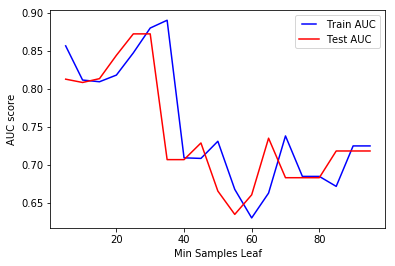

In [152]:
min_samples_leafs = [x for x in range(1,100) if x%5==0]
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = tree.DecisionTreeClassifier(min_samples_leaf = min_samples_leaf)
    dt.fit(train_X, train_y)
    
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positve_rate, thresholds = metrics.roc_curve(train_y, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    test_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, test_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Min Samples Leaf')
plt.show()

#### <center> Tune `max_features`

`max_features represents the number of features to consider when looking for the best split`

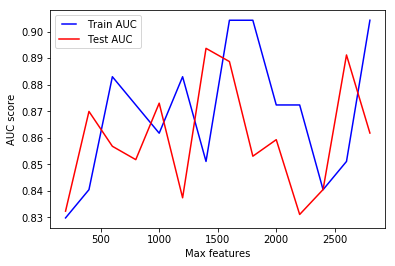

In [157]:
max_features = [ x for x in list(range(1,train_X.shape[1])) if x%200==0]
train_results = []
test_results = []
for max_feature in max_features:
    dt = tree.DecisionTreeClassifier(max_features = max_feature)
    dt.fit(train_X, train_y)
    
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positve_rate, thresholds = metrics.roc_curve(train_y, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    test_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, test_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max features')
plt.show()

### 5- Using Random Forest Classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
print ("Training model")
#train model

model.fit(train_X,train_y)
result = model.predict(test_X)

print('Metric for Random Forest Classifier')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)

Training model
Metric for Decision Tree Classifier
Accuracy: 0.976471
Precision: 0.864865
Recall: 0.680851
F1 score: 0.761905
Cohens kappa: 0.749713
ROC AUC: 0.837312
[[798   5]
 [ 15  32]]


In [159]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### HyperParameter Tuning for Random Forest Classifier

#### <center> Tune `n_estimators`
`n_estimators represents the number of trees in the forest`

In [186]:
dt = RandomForestClassifier(n_estimators = n_estimator, n_jobs=-1)
dt.fit(train_X, train_y)
dt.predict_proba(train_X)[:,1]

array([1., 1., 1., ..., 0., 0., 0.])

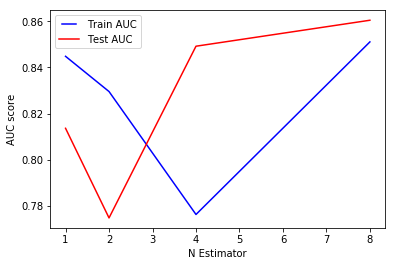

In [163]:
n_estimators = [1, 2, 4, 8] #n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for n_estimator in n_estimators:
    dt = RandomForestClassifier(n_estimators = n_estimator, n_jobs=-1)
    dt.fit(train_X, train_y)
    
    train_pred = dt.predict(train_X)
    false_positive_rate, true_positve_rate, thresholds = metrics.roc_curve(train_y, train_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    test_pred = dt.predict(test_X)
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, test_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('N Estimator')
plt.show()

#### `Other Hyperparameters used in Random Forest are same as those of Decision Tree Classifier`

`If int, then consider below_hyper_parameter as the minimum number.`

`If float, then below_hyper_parameter is a fraction and ceil(below_hyper_parameter * n_samples) are the below_hyper_parameter for each split.`
1. max_depth
2. min_samples_split
3. min_samples_leaf
4. max_features

### 5- Using AdaBoost

In [189]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=80, random_state=1)
print ("Training model")
model.fit(train_X,train_y)
result = model.predict(test_X)

print('Metric for AdaBoost Classifier')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)

Training model
Metric for AdaBoost Classifier
Accuracy: 0.976471
Precision: 0.775510
Recall: 0.808511
F1 score: 0.791667
Cohens kappa: 0.779204
ROC AUC: 0.897406
[[792  11]
 [  9  38]]


### 6- Using XGBoost Classifier

In [191]:
# XGBoost 
from xgboost import XGBClassifier
model = XGBClassifier()
# n_estimators = 100 (default)
# max_depth = 3 (default)
print ("Training model")
model.fit(train_X,train_y)
result = model.predict(test_X)

print('Metric for XGBoost Classifier')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)

Training model
Metric for XGBoost Classifier
Accuracy: 0.976471
Precision: 0.965517
Recall: 0.595745
F1 score: 0.736842
Cohens kappa: 0.725248
ROC AUC: 0.797250
[[802   1]
 [ 19  28]]


### 7- Using LightGBM

In [192]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
print ("Training model")
model.fit(train_X,train_y)
result = model.predict(test_X)

print('Metric for LightGBM Classifier')
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_y, result)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_y, result)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test_y, result)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_y, result)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(test_y, result)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(test_y, result)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test_y, result)
print(matrix)


Training model
Metric for LightGBM Classifier
Accuracy: 0.981176
Precision: 0.878049
Recall: 0.765957
F1 score: 0.818182
Cohens kappa: 0.808305
ROC AUC: 0.879865
[[798   5]
 [ 11  36]]


### 8- Using RNN

In [194]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

model = Sequential()
model.add(Embedding(3000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(train_X,train_y, epochs=10, batch_size=60, validation_split=0.2)

Train on 3760 samples, validate on 940 samples
Epoch 1/10
3760/3760 [==============================] - 70s 19ms/step - loss: 0.4907 - acc: 0.8043 - val_loss: 0.1880 - val_acc: 1.0000
Epoch 2/10
3760/3760 [==============================] - 68s 18ms/step - loss: 0.4825 - acc: 0.8138 - val_loss: 0.2292 - val_acc: 1.0000
Epoch 3/10
3760/3760 [==============================] - 70s 19ms/step - loss: 0.4826 - acc: 0.8138 - val_loss: 0.1984 - val_acc: 1.0000
Epoch 4/10
3760/3760 [==============================] - 70s 19ms/step - loss: 0.4816 - acc: 0.8138 - val_loss: 0.1994 - val_acc: 1.0000
Epoch 5/10
3760/3760 [==============================] - 67s 18ms/step - loss: 0.4808 - acc: 0.8138 - val_loss: 0.2496 - val_acc: 1.0000
Epoch 6/10
3760/3760 [==============================] - 68s 18ms/step - loss: 0.4816 - acc: 0.8138 - val_loss: 0.1769 - val_acc: 1.0000
Epoch 7/10
3760/3760 [==============================] - 68s 18ms/step - loss: 0.4823 - acc: 0.8138 - val_loss: 0.1928 - val_acc: 1.0000
E

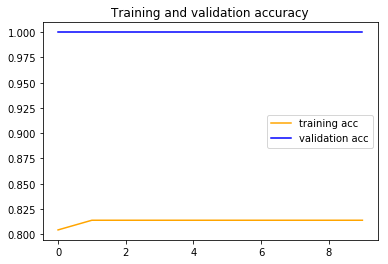

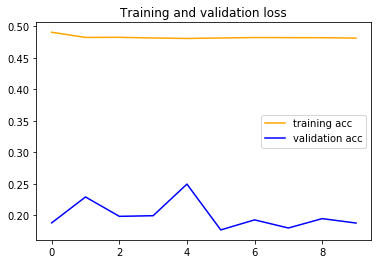

In [195]:
# Plot Metrics
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [196]:
# plot COnfusion Metrics
pred = model.predict_classes(test_X)
acc = model.evaluate(test_X, test_y)
proba_rnn = model.predict_proba(test_X)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(test_y, pred))

850/850 [==============================] - 7s 8ms/step
Test loss is 0.27 accuracy is 0.94  
[[803   0]
 [ 47   0]]


### 9- Using LSTM

In [197]:
model = Sequential()
model.add(Embedding(3000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(train_X,train_y, epochs=10, batch_size=60, validation_split=0.2)

Train on 3760 samples, validate on 940 samples
Epoch 1/10
3760/3760 [==============================] - 281s 75ms/step - loss: 0.5117 - acc: 0.8043 - val_loss: 0.1855 - val_acc: 1.0000
Epoch 2/10
3760/3760 [==============================] - 274s 73ms/step - loss: 0.4837 - acc: 0.8138 - val_loss: 0.1906 - val_acc: 1.0000
Epoch 3/10
3760/3760 [==============================] - 278s 74ms/step - loss: 0.4818 - acc: 0.8138 - val_loss: 0.1878 - val_acc: 1.0000
Epoch 4/10
3760/3760 [==============================] - 268s 71ms/step - loss: 0.4822 - acc: 0.8138 - val_loss: 0.2604 - val_acc: 1.0000
Epoch 5/10
3760/3760 [==============================] - 270s 72ms/step - loss: 0.4831 - acc: 0.8138 - val_loss: 0.2057 - val_acc: 1.0000
Epoch 6/10
3760/3760 [==============================] - 276s 73ms/step - loss: 0.4817 - acc: 0.8138 - val_loss: 0.2150 - val_acc: 1.0000
Epoch 7/10
3760/3760 [==============================] - 288s 76ms/step - loss: 0.4814 - acc: 0.8138 - val_loss: 0.2190 - val_acc: 1

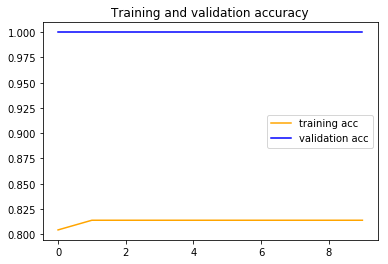

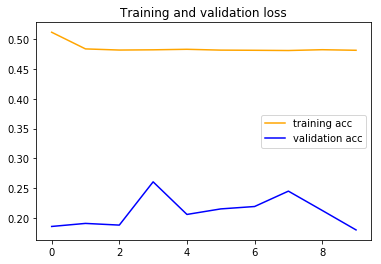

In [198]:
# Plot Metrics
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [199]:
# plot COnfusion Metrics
pred = model.predict_classes(test_X)
acc = model.evaluate(test_X, test_y)
proba_rnn = model.predict_proba(test_X)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(test_y, pred))

850/850 [==============================] - 16s 18ms/step
Test loss is 0.27 accuracy is 0.94  
[[803   0]
 [ 47   0]]
